# Ejercicio 1

In [ ]:
file_id = '1tzQlFHjrlz3t93wgRKGMoEGL1Xa20j6T'  # tu ID de archivo
!gdown --id {file_id} --output PRADERA.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1tzQlFHjrlz3t93wgRKGMoEGL1Xa20j6T
To: /content/PRADERA.zip
100% 1.20M/1.20M [00:00<00:00, 20.2MB/s]


In [ ]:
file_id = '1Ne47oX_eSlMY2-q7NFndP6EX3Q43BntY'  # tu ID de archivo
!gdown --id {file_id} --output consultas.csv

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ne47oX_eSlMY2-q7NFndP6EX3Q43BntY
To: /content/consultas.csv
100% 19.8k/19.8k [00:00<00:00, 23.3MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("PRADERA.zip", 'r') as zip_ref:
    zip_ref.extractall("PRADERA")

In [ ]:
import pandas as pd
with open('PRADERA/PRADERA/datos/informacion/Mecanica_del_juego.txt', 'r') as f:
       text = f.read()
text

'Conviértete en un explorador que compite con otros por ver quién es el observador de la naturaleza más hábil en un viaje para el que no se necesita más que el deseo por descubrir los misterios de la naturaleza y una mirada llena de curiosidad por cada pequeño detalle que nos encontremos en el camino.\nAsí se nos presenta Pradera, diseñado por Klemens Kalicki, responsable de Dream Home. El juego fue publicado en 2021 por Rebel Studio en una versión en polaco. De las ilustraciones se encarga Karolina Kijak, siendo esta su primera incursión en el mundo de los juegos de mesa.\nSe encuentra publicado en español por Asmodee Ibérica (aunque el juego es completamente independiente del idioma). Permite partidas de 1 a 4 jugadores, con una edad mínima sugerida de 10 años y una duración aproximada de entre 60 y 90 minutos. El precio de venta al público es de 44,99€. Para esta reseña se ha utilizado una copia de la versión en español de Asmodee Ibérica, que la propia editorial nos ha cedido amabl

# Ejercicio 2

In [ ]:
!pip install pysbd

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 5.5 MB/s eta 0:00:00


## Segmentacion

In [ ]:
import pysbd

# Inicializamos el segmentador de oraciones para español
seg = pysbd.Segmenter(language="es", clean=False)

# Usamos pySBD para segmentar el texto en oraciones individuales
oraciones = seg.segment(text)

# Establecer un umbral de longitud mínima para los fragmentos
umbral_minimo = 3  # Por ejemplo, fragmentos con al menos 3 palabras

# Filtrar fragmentos demasiado cortos
oraciones = [fragmento for fragmento in oraciones if len(fragmento.split()) >= umbral_minimo]

print(oraciones)

['Conviértete en un explorador que compite con otros por ver quién es el observador de la naturaleza más hábil en un viaje para el que no se necesita más que el deseo por descubrir los misterios de la naturaleza y una mirada llena de curiosidad por cada pequeño detalle que nos encontremos en el camino.\n', 'Así se nos presenta Pradera, diseñado por Klemens Kalicki, responsable de Dream Home. ', 'El juego fue publicado en 2021 por Rebel Studio en una versión en polaco. ', 'De las ilustraciones se encarga Karolina Kijak, siendo esta su primera incursión en el mundo de los juegos de mesa.\n', 'Se encuentra publicado en español por Asmodee Ibérica (aunque el juego es completamente independiente del idioma). ', 'Permite partidas de 1 a 4 jugadores, con una edad mínima sugerida de 10 años y una duración aproximada de entre 60 y 90 minutos. ', 'El precio de venta al público es de 44,99€. ', 'Para esta reseña se ha utilizado una copia de la versión en español de Asmodee Ibérica, que la propia 

Probe con diferentes segmentadores de texto, con spacy me dejaba muchos fragmentos con pocas palabras, con stanza dividia bien los fragmentos pero toma mucho tiempo computacional por lo tanto me quedo con pysbd que es un balance entre todas, deja algunos fragmentos con 1 o 2 palabras pero pocos entonces lo limpiamos con una filtracion

## Vectorizacion

In [ ]:
frases_pradera = [
    "Coloca los animales en el terreno adecuado para optimizar tus recursos.",
    "Cada estación influye en el crecimiento de los cultivos y en el bienestar de tus animales.",
    "Las cartas de acción permiten hacer movimientos estratégicos en tu turno.",
    "El tipo de terreno que elijas impacta directamente en las acciones que puedes realizar.",
    "Asegúrate de tener suficiente comida para tus animales antes de que llegue el invierno.",
    "El equilibrio entre la siembra de cultivos y la cría de animales es crucial para el éxito.",
    "Las cartas de evento alteran las condiciones del juego y pueden cambiar tu estrategia.",
    "Las acciones disponibles dependen del número de trabajadores que tienes en el campo.",
    "El sistema de puntos de victoria se obtiene a través de la correcta gestión de los recursos.",
    "Los diferentes tipos de animales requieren distintos tipos de cuidados y recursos.",
    "Los jugadores deben adaptarse a los cambios en el clima para aprovechar al máximo sus tierras.",
    "El juego fomenta la interacción entre jugadores a través del comercio de recursos.",
    "Usar sabiamente tus cartas de acción puede determinar el rumbo del juego.",
    "Las estaciones del año representan ciclos que afectan la producción y el manejo del ganado.",
    "Los jugadores compiten por el uso eficiente de los recursos limitados del mapa.",
    "Gestiona bien los turnos de siembra y cosecha para optimizar tus ganancias.",
    "Los animales más grandes requieren más espacio, pero te otorgan mayores recompensas.",
    "La estrategia a largo plazo es clave, ya que los recursos no son ilimitados.",
    "El intercambio de recursos entre jugadores puede marcar la diferencia en el desarrollo de tu granja.",
    "El control de las áreas de terreno más productivas es fundamental para avanzar rápidamente."
]

In [ ]:
!pip install --upgrade --force-reinstall numpy==1.23.5 scipy==1.10.1 gensim==4.3.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 32.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.6/26.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 6.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: smart-open 7.1.0
    Uninstalling smart-open-7.1.0:
      Successfully uninstalled smart-open-7.1.0
  Attempting uninstall: scipy
    Found existing installatio

In [ ]:
from gensim.models import Doc2Vec
from nltk.tokenize import word_tokenize
import nltk
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from gensim.models.doc2vec import TaggedDocument
nltk.download('punkt')
nltk.download('punkt_tab')

# Tokenizar el texto
tokenized_text = [word_tokenize(frase.lower()) for frase in oraciones]
tokenized_queries = [word_tokenize(frase.lower()) for frase in frases_pradera]

# 2. Etiquetar cada fragmento para entrenar Doc2Vec
tagged_data = [TaggedDocument(words=texto, tags=[str(i)]) for i, texto in enumerate(tokenized_text)]

# 3. Entrenar el modelo Doc2Vec
model_doc2vec = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=100)
model_doc2vec.build_vocab(tagged_data)
model_doc2vec.train(tagged_data, total_examples=model_doc2vec.corpus_count, epochs=model_doc2vec.epochs)

# 4. Obtener los vectores de los fragmentos entrenados
fragment_vectors = [model_doc2vec.infer_vector(texto) for texto in tokenized_text]

# 5. Obtener los vectores de las frases de búsqueda
# Doc2Vec no puede inferir vectores para texto corto sin etiquetas. Para resolver esto, tratamos de obtener los vectores de las frases de búsqueda.
query_vectors = [model_doc2vec.infer_vector(texto) for texto in tokenized_queries]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Probe vectorizar con diferentes herramientas. TF-IDF. Aunque me vectorizaba bien, notaba que no tenia en cuenta el contexto del fragmento o la frase, tampoco tenia en cuenta palabras similares

## Similitud

In [ ]:
#Calcular la similitud de coseno entre las frases y los fragmentos
# Usamos cosine_similarity para comparar los vectores
for i, query_vector in enumerate(query_vectors):
    similitudes = cosine_similarity([query_vector], fragment_vectors).flatten()

    # Obtener los índices de los fragmentos más similares
    idx_mas_similar = similitudes.argmax()

    print(f"\n🔍 Frase de búsqueda: {frases_pradera[i]}")
    print(f"➡️ Fragmento más similar: {oraciones[idx_mas_similar]}")
    print(f"🧮 Similitud coseno: {similitudes[idx_mas_similar]:.4f}")


🔍 Frase de búsqueda: Coloca los animales en el terreno adecuado para optimizar tus recursos.
➡️ Fragmento más similar: ¡Ya podemos comenzar!

🧮 Similitud coseno: 0.9057

🔍 Frase de búsqueda: Cada estación influye en el crecimiento de los cultivos y en el bienestar de tus animales.
➡️ Fragmento más similar: Cuando un jugador ejecute una acción en el tablero de campamento y sea el primero en disponer de los dos símbolos de una posición circular, podrá colocar en ella una Ficha de Bonificación, que proporcionará puntos al final de la partida.

🧮 Similitud coseno: 0.8184

🔍 Frase de búsqueda: Las cartas de acción permiten hacer movimientos estratégicos en tu turno.
➡️ Fragmento más similar: La acción asociada a las fichas se utilizará en el Tablero de Campamento, el cual muestra unas muescas en las que encajar las fichas por su parte recta. 
🧮 Similitud coseno: 0.8630

🔍 Frase de búsqueda: El tipo de terreno que elijas impacta directamente en las acciones que puedes realizar.
➡️ Fragmento

In [ ]:
!pip install textdistance

In [ ]:
import textdistance
def comparar_distancias(query, fragmentos):
    resultados = []

    for frag in fragmentos:
        # Sets para Jaccard y Dice
        set_q = set(query.lower().split())
        set_f = set(frag.lower().split())
        sim_jaccard = textdistance.jaccard.normalized_similarity(set_q, set_f)
        sim_dice = textdistance.dice.normalized_similarity(set_q, set_f)

        # Strings para Jaro-Winkler y Levenshtein
        sim_jw = textdistance.jaro_winkler.normalized_similarity(query, frag)
        sim_lev = textdistance.levenshtein.normalized_similarity(query, frag)

        resultados.append({
            "fragmento": frag,
            "jaccard": sim_jaccard,
            "dice": sim_dice,
            "jaro_winkler": sim_jw,
            "levenshtein": sim_lev
        })

    return resultados

# 🔄 Aplicar a todas las frases de búsqueda
for i, consulta in enumerate(frases_pradera):
    print(f"\n🔍 Consulta: {consulta}")

    # Similitudes por distancia
    similitudes = comparar_distancias(consulta, oraciones)

    # Mostrar la más similar para cada métrica
    for metrica in ["jaccard", "dice", "jaro_winkler", "levenshtein"]:
        top = sorted(similitudes, key=lambda x: x[metrica], reverse=True)[0]
        print(f"📏 {metrica.capitalize()}: '{top['fragmento']}' → Similitud: {top[metrica]:.4f}")

    # Similitud coseno
    query_vector = query_vectors[i].reshape(1, -1)
    similitudes_coseno = cosine_similarity(query_vector, fragment_vectors).flatten()
    idx_mas_similar = similitudes_coseno.argmax()
    print(f"🧮 Similitud coseno: '{oraciones[idx_mas_similar]}' → Similitud: {similitudes_coseno[idx_mas_similar]:.4f}")


🔍 Consulta: Coloca los animales en el terreno adecuado para optimizar tus recursos.
📏 Jaccard: 'El tablero también permite colocar piezas en espacios horizontales para jugar cartas de forma individual.
' → Similitud: 0.1304
📏 Dice: 'El tablero también permite colocar piezas en espacios horizontales para jugar cartas de forma individual.
' → Similitud: 0.2308
📏 Jaro_winkler: 'Por un lado, las cartas de terreno y las cartas de observación. ' → Similitud: 0.7507
📏 Levenshtein: 'Estas cartas estarán inicialmente en el Tablero de Suministro, compuesto por cuatro filas y cuatro columnas. ' → Similitud: 0.3486
🧮 Similitud coseno: '¡Ya podemos comenzar!
' → Similitud: 0.9034

🔍 Consulta: Cada estación influye en el crecimiento de los cultivos y en el bienestar de tus animales.
📏 Jaccard: 'La partida finaliza al término de un determinado número de rondas, tras las cuales cada jugador anota los puntos visibles en las cartas de su zona y las bonificaciones conseguidas en el tablero principal.
' 

Luego de probar diferentes técnicas de comparación de similitud entre frases (coseno, Jaccard, Dice, Jaro-Winkler, Levenshtein), se observa que:

La similitud del coseno, al estar basada en vectores generados por Doc2Vec, logra captar mejor relaciones semánticas entre frases, incluso cuando no comparten palabras exactas.

En cambio, técnicas como Levenshtein o Jaccard funcionan bien cuando las frases son muy similares en escritura, pero fallan cuando hay sinónimos o reformulaciones.

Por lo tanto, la similitud del coseno es la más adecuada para búsquedas semánticas, ya que no depende tanto del texto exacto sino del contenido.

## Tsne

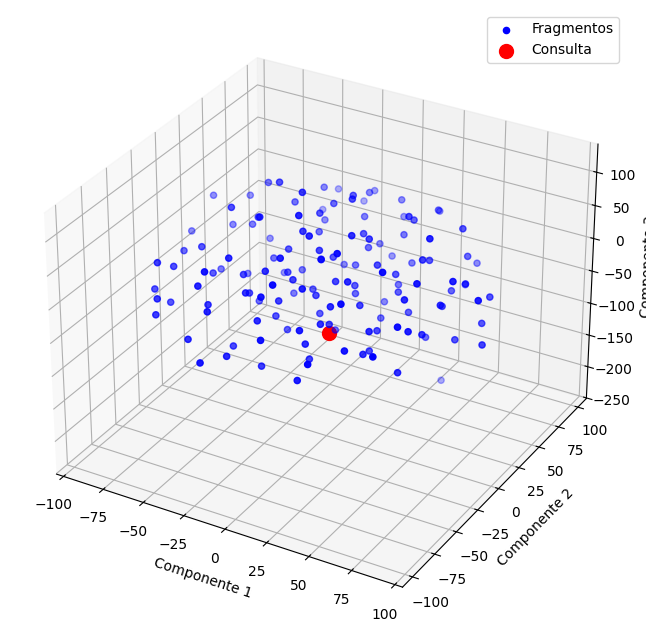

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from scipy.sparse import vstack

# 1. Concatenar los fragmentos y la query
X_combinado = vstack([fragment_vectors, query_vectors])  # X son los fragmentos, query_vector es la query

# 2. Reducir la dimensionalidad con t-SNE a 3D
tsne = TSNE(n_components=3, random_state=42)
X_tsne = tsne.fit_transform(X_combinado.toarray())  # Convertimos la matriz dispersa a densa para t-SNE

# 3. Visualización en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Fragmentos (puntos)
ax.scatter(X_tsne[:-1, 0], X_tsne[:-1, 1], X_tsne[:-1, 2], c='blue', label='Fragmentos')

# Consulta (punto final)
ax.scatter(X_tsne[-1, 0], X_tsne[-1, 1], X_tsne[-1, 2], c='red', label='Consulta', s=100)

# Etiquetas y leyenda
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.legend()

# Mostrar el gráfico
plt.show()

La consulta (punto rojo) aparece relativamente cerca del centroide de los puntos azules (fragmentos). Esto sugiere que la consulta es semánticamente similar a varios fragmentos, lo cual es una buena señal de que Doc2Vec logró capturar bien la relación de significado entre frases.

Si en cambio apareciera aislada o muy lejos del conjunto azul, indicaría que no se relaciona bien con los fragmentos.



# Ejercicio 3

## Extraccion de texto y limpieza

In [ ]:
with open('PRADERA/PRADERA/datos/informacion/reglamento_español.txt', 'r') as f:
       texto = f.read()
texto

'\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nInstrukcja\n\nNie musisz czytać tej \ninstrukcji, obejrzyj \nfilm prezentujący \n\nzasady.\n\nReglamento ¿No te apetece leer las reglas? \nEscanea el código QR para \n\nver un videotutorial.\n\nRBME01ES_Rulebook_AMS.indd   1RBME01ES_Rulebook_AMS.indd   1 04/03/2021   12:59:4704/03/2021   12:59:47\n\n\n\n3\n\nDel autor\nMe gustaría dar las gracias a todos los probadores del \njuego y colegas de Rebel Studio: sin vuestra participación, \npaciencia y amabilidad mi simple prototipo nunca se \nhabría convertido en un juego de verdad.\n\nMi hijo Wojciech me acompañó en todas las etapas \ndel desarrollo de Pradera. Su entusiasmo, su fe inquebrantable y su voluntad para ayudar (así como \nconvencerme de ir a pasear por los bosques y prados circundantes) fueron el mejor apoyo en los momentos \nde duda. ¡Muchas gracias por todo lo que hiciste por mí!\n\nEn Pradera los jugadores se convierten en espectadores de la naturaleza

In [ ]:
import re

def limpiar_texto(texto):
    # Eliminar saltos de línea duplicados
    texto = re.sub(r'\n+', '\n', texto)

    # Eliminar identificadores tipo "RBME01ES_Rulebook_AMS.indd"
    texto = re.sub(r'\b\w*RBME\w*\b', '', texto)

    # Eliminar fechas y horas
    texto = re.sub(r'\d{2}/\d{2}/\d{4}', '', texto)
    texto = re.sub(r'\d{2}:\d{2}:\d{2}', '', texto)

    # Eliminar números
    texto = re.sub(r'\d+', '', texto)

    # Eliminar múltiples espacios o líneas vacías
    texto = re.sub(r'\n\s*\n', '\n', texto)
    texto = re.sub(r'[ \t]+', ' ', texto)

    # Eliminar caracteres no alfabéticos (excepto letras con tilde y ñ)
    texto = re.sub(r'[^A-Za-zÁÉÍÓÚáéíóúÑñüÜ\s]', '', texto)

    # Quitar espacios al principio y al final
    texto = texto.strip()

    return texto

texto_limpio = limpiar_texto(texto)

print(texto_limpio)

Instrukcja
Nie musisz czyta tej 
instrukcji obejrzyj 
film prezentujcy 
zasady
Reglamento No te apetece leer las reglas 
Escanea el código QR para 
ver un videotutorial
indd indd 
Del autor
Me gustaría dar las gracias a todos los probadores del 
juego y colegas de Rebel Studio sin vuestra participación 
paciencia y amabilidad mi simple prototipo nunca se 
habría convertido en un juego de verdad
Mi hijo Wojciech me acompañó en todas las etapas 
del desarrollo de Pradera Su entusiasmo su fe inquebrantable y su voluntad para ayudar así como 
convencerme de ir a pasear por los bosques y prados circundantes fueron el mejor apoyo en los momentos 
de duda Muchas gracias por todo lo que hiciste por mí
En Pradera los jugadores se convierten en espectadores de la naturaleza donde los animales y las plantas 
protagonizan historias de lo más interesante Equipados con un mapa los jugadores explorarán una zona 
pintoresca en busca de inspiración y capturarán impresionantes vistas Avanzarán guiados p

## Extraccion de sustantivos(POS)

In [ ]:
!python -m spacy download es_core_news_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import pandas as pd
# Cargar el modelo preentrenado para español
nlp = spacy.load('es_core_news_lg')

# Procesar el texto con el modelo de spaCy
doc = nlp(texto_limpio)

# Crear una lista para almacenar las palabras, etiquetas POS y explicaciones
data = []

# Iterar sobre los tokens en el Doc y agregar los detalles a la lista de datos
for token in doc:
    data.append([token.text, token.pos_, spacy.explain(token.pos_)])

# Crear un DataFrame a partir de la lista de datos
df = pd.DataFrame(data, columns=['Palabra', 'Etiqueta POS', 'Explicación'])
df_filt = df[df['Etiqueta POS'] ==  'NOUN']
# Imprimir el DataFrame
print(df_filt)

            Palabra Etiqueta POS Explicación
21           reglas         NOUN        noun
25           código         NOUN        noun
31    videotutorial         NOUN        noun
37            autor         NOUN        noun
43          gracias         NOUN        noun
...             ...          ...         ...
6286              N         NOUN        noun
6287              N         NOUN        noun
6288              N         NOUN        noun
6301        edición         NOUN        noun
6304       derechos         NOUN        noun

[1543 rows x 3 columns]


In [ ]:
#Filtramos por sustantivos y por palabras que tenga 3 o mas caracteres
df_filt = df[df['Etiqueta POS'] ==  'NOUN']
df_filt = df_filt[df_filt['Palabra'].str.len() >= 3].reset_index(drop=True)
print(df_filt)

            Palabra Etiqueta POS Explicación
0            reglas         NOUN        noun
1            código         NOUN        noun
2     videotutorial         NOUN        noun
3             autor         NOUN        noun
4           gracias         NOUN        noun
...             ...          ...         ...
1522           mazo         NOUN        noun
1523        Ejemplo         NOUN        noun
1524          turno         NOUN        noun
1525        edición         NOUN        noun
1526       derechos         NOUN        noun

[1527 rows x 3 columns]


## Categorizacion de sustantivos(NER)

In [ ]:
# Imprimir las entidades nombradas, etiquetas y explicaciones
for ent in doc.ents:
    print(f'Entidad: {ent.text}, Etiqueta: {ent.label_}, Explicación: {spacy.explain(ent.label_)}')

Entidad: Instrukcja
Nie, Etiqueta: PER, Explicación: Named person or family.
Entidad: prezentujcy 
zasady
Reglamento, Etiqueta: MISC, Explicación: Miscellaneous entities, e.g. events, nationalities, products or works of art
Entidad: Escanea, Etiqueta: MISC, Explicación: Miscellaneous entities, e.g. events, nationalities, products or works of art
Entidad: Del autor
Me, Etiqueta: MISC, Explicación: Miscellaneous entities, e.g. events, nationalities, products or works of art
Entidad: Rebel Studio, Etiqueta: MISC, Explicación: Miscellaneous entities, e.g. events, nationalities, products or works of art
Entidad: Mi hijo Wojciech, Etiqueta: MISC, Explicación: Miscellaneous entities, e.g. events, nationalities, products or works of art
Entidad: Pradera, Etiqueta: PER, Explicación: Named person or family.
Entidad: Muchas, Etiqueta: LOC, Explicación: Non-GPE locations, mountain ranges, bodies of water
Entidad: Pradera, Etiqueta: LOC, Explicación: Non-GPE locations, mountain ranges, bodies of wa

In [ ]:
#Visualizador incluido en spacy
from spacy import displacy

for sent in doc.sents:
    displacy.render(nlp(sent.text),style='ent',jupyter=True)

## Busqueda de similitud

In [ ]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 14.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import textdistance
from sklearn.metrics.pairwise import cosine_similarity

# Cargar modelo de spaCy con vectores (es_core_news_md)
nlp = spacy.load("es_core_news_md")
#Seleccionar solo los primeros 20
df_filt = df_filt.head(30).copy()
# Precomputar embeddings de spaCy
df_filt["vector"] = df_filt["Palabra"].apply(lambda x: nlp(x).vector)

# Función para comparar un sustantivo contra los demás
def comparar_sustantivo(query, df):
    resultados = []
    vec_query = nlp(query).vector.reshape(1, -1)

    for _, row in df.iterrows():
        target = row["Palabra"]
        vec_target = row["vector"].reshape(1, -1)

        # Métricas de texto
        set_q = set(query.lower())
        set_t = set(target.lower())
        sim_jaccard = textdistance.jaccard.normalized_similarity(set_q, set_t)
        sim_dice = textdistance.dice.normalized_similarity(set_q, set_t)
        sim_jw = textdistance.jaro_winkler.normalized_similarity(query, target)
        sim_lev = textdistance.levenshtein.normalized_similarity(query, target)

        # Coseno
        sim_cos = cosine_similarity(vec_query, vec_target)[0][0]

        resultados.append({
            "target": target,
            "jaccard": sim_jaccard,
            "dice": sim_dice,
            "jaro_winkler": sim_jw,
            "levenshtein": sim_lev,
            "coseno": sim_cos
        })

    return resultados

# Comparar cada sustantivo con todos los demás
for noun in df_filt["Palabra"]:
    print(f"\n🔍 Comparando con: {noun}")
    similares = comparar_sustantivo(noun, df_filt[df_filt["Palabra"] != noun])

    for metrica in ["jaccard", "dice", "jaro_winkler", "levenshtein", "coseno"]:
        top = sorted(similares, key=lambda x: x[metrica], reverse=True)[0]
        print(f"📏 {metrica.capitalize()}: '{top['target']}' → Similitud: {top[metrica]:.4f}")


🔍 Comparando con: reglas
📏 Jaccard: 'colegas' → Similitud: 0.6250
📏 Dice: 'colegas' → Similitud: 0.7692
📏 Jaro_winkler: 'colegas' → Similitud: 0.7825
📏 Levenshtein: 'gracias' → Similitud: 0.4286
📏 Coseno: 'etapas' → Similitud: 0.4312

🔍 Comparando con: código
📏 Jaccard: 'gracias' → Similitud: 0.3333
📏 Dice: 'gracias' → Similitud: 0.5000
📏 Jaro_winkler: 'hijo' → Similitud: 0.6111
📏 Levenshtein: 'juego' → Similitud: 0.3333
📏 Coseno: 'videotutorial' → Similitud: 0.3916

🔍 Comparando con: videotutorial
📏 Jaccard: 'voluntad' → Similitud: 0.6364
📏 Dice: 'voluntad' → Similitud: 0.7778
📏 Jaro_winkler: 'desarrollo' → Similitud: 0.6316
📏 Levenshtein: 'autor' → Similitud: 0.3077
📏 Coseno: 'código' → Similitud: 0.3916

🔍 Comparando con: autor
📏 Jaccard: 'videotutorial' → Similitud: 0.5000
📏 Dice: 'videotutorial' → Similitud: 0.6667
📏 Jaro_winkler: 'jugadores' → Similitud: 0.6648
📏 Levenshtein: 'jugadores' → Similitud: 0.3333
📏 Coseno: 'naturaleza' → Similitud: 0.2773

🔍 Comparando con: gracias
📏 

A traves del analisis hecho con lasd diferentes metodos de calculo de distancias filtrando por sustantivos, a pesar de que métricas como Jaccard o Levenshtein pueden mostrar valores más altos, la similitud coseno basada en embeddings semánticos es más precisa para comparar sustantivos, ya que refleja el significado y contexto de las palabras, y no solo su estructura superficial. Por ejemplo en el caso de 'gracias' la mayoria devuelve 'reglas' y coseno devuelve 'amabilidad', que tiene mas sentido en este contexto

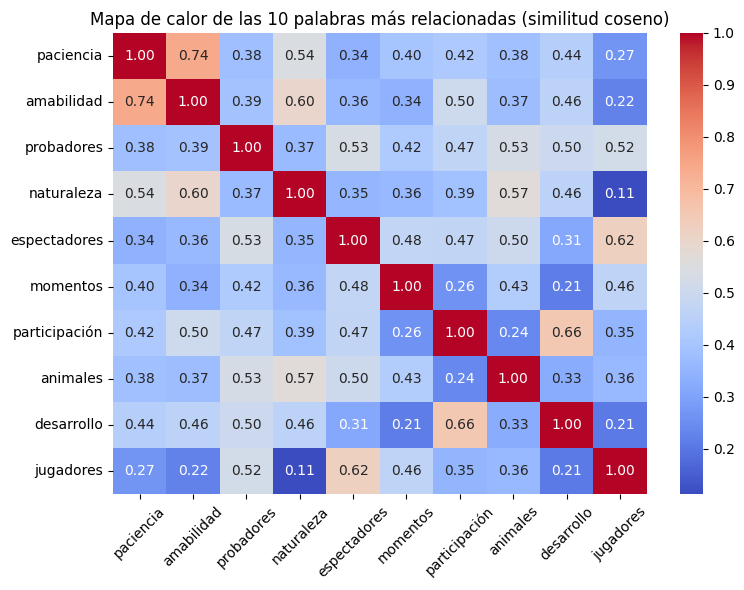

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Matriz de similitud coseno
matriz_similitud = cosine_similarity(list(df_filt["vector"]))
etiquetas = df_filt["Palabra"].tolist()

# Crear DataFrame de similitud
df_sim = pd.DataFrame(matriz_similitud, index=etiquetas, columns=etiquetas)

# Calcular la similitud promedio por palabra
sim_promedio = df_sim.mean(axis=1)

# Seleccionar top 10 palabras más relacionadas (mayor similitud promedio)
top10_palabras = sim_promedio.sort_values(ascending=False).head(10).index

# Filtrar la matriz de similitud para solo esas 10
df_sim_top10 = df_sim.loc[top10_palabras, top10_palabras]

# Plot del heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_sim_top10, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor de las 10 palabras más relacionadas (similitud coseno)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

A traves de este mapa de calor podemos ver mejor y mas representativo la relacion entre los sustantivos. Amabilidad y paciencia son las mas relacionadas, seguido de espectadores y jugadores, naturaleza y amabilidad, animales y naturaleza.

# Ejercicio 4

## Detectar idiomas

In [ ]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 40.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=97b9cfcd5f7a73364a7c20d7dc46cf90a26d323c5e52abdbef0effc89d759cec
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect


In [ ]:
import os
import pandas as pd
from langdetect import detect

ruta_raiz = "PRADERA/PRADERA/datos"
datos = []

for root, dirs, files in os.walk(ruta_raiz):
    for archivo in files:
        # 🔍 Filtrar archivos con "enlace" en el nombre
        if "enlaces_pagina" in archivo.lower() or "enlaces_imagenes" in archivo.lower():
            continue  # saltearlos

        ruta_completa = os.path.join(root, archivo)
        extension = archivo.lower().split(".")[-1]

        try:
            if extension == "txt":
                with open(ruta_completa, "r", encoding="utf-8") as f:
                    texto = f.read()

            elif extension == "csv":
                df = pd.read_csv(ruta_completa, encoding="utf-8")
                texto = " ".join(df.astype(str).stack().tolist())

            else:
                continue  # ignorar otros formatos

            idioma = detect(texto)
            datos.append({
                "archivo": archivo,
                "idioma": idioma
            })

        except Exception as e:
            print(f"⚠️ Error leyendo {ruta_completa}: {e}")

df_idiomas = pd.DataFrame(datos)
print(df_idiomas)

                               archivo idioma
0                 relaciones_juego.csv     en
1                       info_juego.txt     en
2                   foro_variantes.txt     en
3                      comentarios.txt     es
4               Mecanica_del_juego.txt     es
5              descripcion_general.txt     en
6                      foro_reglas.txt     en
7   Pradera_Tutorial_English_video.txt     en
8                reglamento_ingles.txt     en
9                     foro_reviews.txt     en
10                    introduccion.txt     es
11                    foro_general.txt     en
12              reglamento_español.txt     es
13  Pradera_Tutorial_Spanish_video.txt     es
14                    meadow_stats.csv     en


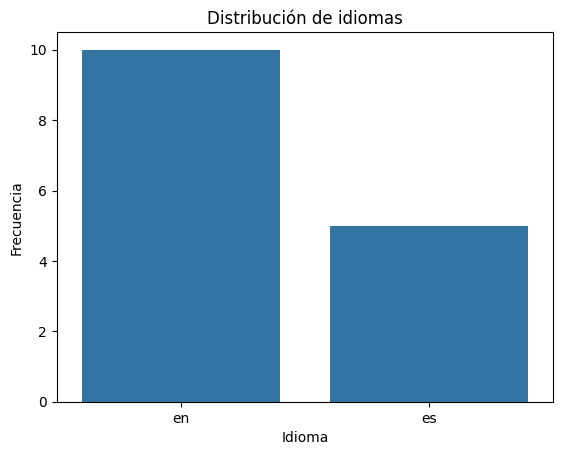

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df_idiomas, x='idioma')
plt.title('Distribución de idiomas')
plt.xlabel('Idioma')
plt.ylabel('Frecuencia')
plt.show()

Vemos cierto desbalance entre los idiomas ingles y español

# Ejercicio 5

In [130]:
import re
with open('PRADERA/PRADERA/datos/informacion/comentarios.txt', 'r') as f:
       comentarios = f.read()
# Convertir el texto a una lista de fragmentos
comentarios = re.split(r'\n\d+', comentarios)
comentarios

['1 Espectacular. Desde que se anunció ya me llamó la atención con su precioso arte. Pero con lo que acabas de decir se va a la wishlist de cabeza.Gracias como siempre compañero.',
 ' A mi me tiene encandilado. No deja de ser un juego de draft y colecciones, pero el sistema matricial del quadropolis eleva el nivel de exigencia y la competición por las bonificaciones el nivel de interacción. Siempre acabo las partidas con la sensacion de que me falta una ronda y por qué se acaba tan pronto… xD',
 ' Gran reseña, como siempre. Está gustando mucho en casa, sobre todo el contraste entre lo agradable y bucólico de las cartas, con la tensión que tienes para intentar optimizar y no descolgarte en la carrera por los objetivos… Se puede jugar a varios niveles: disfrutando del «paseito» y bajando lo que puedas o pilles, o estrujándote un poco más. En el segundo caso, es muy interesante el tener que ir varios movimientos por delante y que de repente alguien te robe el objetivo o se lleve la carta 

In [131]:
def preprocesar(texto):
    texto = texto.lower()
    texto = re.sub(r"http\S+", "", texto)  # eliminar URLs
    texto = re.sub(r"[^a-záéíóúñü0-9\s]", "", texto)  # eliminar caracteres especiales
    texto = re.sub(r"\s+", " ", texto)  # quitar espacios extra
    return texto.strip()


In [132]:
len(comentarios)

51

In [ ]:
!pip install sentiment-analysis-spanish


In [ ]:
!pip install transformers

In [ ]:
!pip uninstall -y numpy
!pip install numpy==1.26.4 --no-cache-dir --force-reinstall
!pip install transformers --upgrade --no-cache-dir

Found existing installation: numpy 1.24.3
Uninstalling numpy-1.24.3:
  Successfully uninstalled numpy-1.24.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 300.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cvxpy 1.6.5 requires scipy>=1.11.0, but you have scipy 1.10.1 which is incompatible.
jaxlib 0.5.1 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires scipy>=1.11.1, but you have scipy 1.10.1 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.10.1 which is incompatible.
   

## Analisis de sentimientos

In [133]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

# Cargamos el tokenizador y el modelo
model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Creamos un pipeline de clasificación
nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

Device set to use cpu


In [134]:
from sklearn.metrics import classification_report
# Obtenemos las predicciones de sentimiento para cada frase
resultados = []
for i,comentario in enumerate(comentarios):
    comentario = preprocesar(comentario)
    result = nlp(comentario)[0]
    score = result['score']
    label = int(result['label'][0])
    # Mapear el valor numérico a una categoría
    if label <= 2:
        sentimiento = 'Negativo'
    elif label == 3:
        sentimiento = 'Neutro'
    else:
        sentimiento = 'Positivo'

    # Añadir el resultado al lista de sentimientos
    resultados.append({
        'comentario': comentario,
        'sentimiento': sentimiento
    })

# Convertir la lista de resultados a un DataFrame de pandas
pd.set_option('display.float_format', '{:.6f}'.format)
df_sentimientos = pd.DataFrame(resultados)

df_sentimientos


,comentario,sentimiento
0,1 espectacular desde que se anunció ya me llam...,Positivo
1,a mi me tiene encandilado no deja de ser un ju...,Positivo
2,gran reseña como siempre está gustando mucho e...,Positivo
3,a mi siempre me deja con ganas de seguir jugan...,Positivo
4,hola iván la verdad es que me has sorprendido ...,Positivo
5,bueno its a wonderful world tiene más variabil...,Positivo
6,estaba esperando esta reseña con muchas ganas ...,Positivo
7,hola muchas gracias por la reseña me ha gustad...,Negativo
8,yo no lo tengo por si te sirve de consuelo,Negativo
9,gran reseña imisut como todas recomiendas este...,Positivo


## Similitud semantica

In [137]:
from sentence_transformers import SentenceTransformer, util

sentimientos = df_sentimientos['sentimiento']  # Asumiendo que ya los tenés calculados

# Cargar modelo
modelo = SentenceTransformer('msmarco-MiniLM-L-6-v3')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.50k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/627 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/430 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [145]:

# Consulta del usuario
consulta = "reseña neutra sobre el juego"


# Detectar filtro de sentimiento en la consulta
consulta_lower = consulta.lower()
if "positiva" in consulta_lower:
    filtro = 'Positivo'
elif "negativa" in consulta_lower:
    filtro = 'Negativo'
elif "neutra" in consulta_lower:
    filtro = 'Neutro'
else:
    filtro = None  # sin filtro

# Filtrar comentarios según el sentimiento
comentarios_filtrados = []
indices_filtrados = []
sentimientos = df_sentimientos['sentimiento']
for i, s in enumerate(sentimientos):
    if filtro is None or s == filtro:
        comentarios_filtrados.append(comentarios[i])
        indices_filtrados.append(i)

# Si no hay comentarios que coincidan con el filtro
if not comentarios_filtrados:
    print("No hay comentarios que coincidan con el filtro de sentimiento.")
else:
    # Obtener embeddings
    emb_consulta = modelo.encode(consulta)
    emb_comentarios = modelo.encode(comentarios_filtrados)

    # Calcular similitudes
    similitudes = util.cos_sim(emb_consulta, emb_comentarios)[0]
    mejor_indice = similitudes.argmax()

    # Mostrar mejor resultado
    print(f"Consulta: {consulta}")
    print(f"Resultado más similar (similitud {similitudes[mejor_indice]:.4f}):")
    print(comentarios_filtrados[mejor_indice])
    print(f"Sentimiento: {sentimientos[indices_filtrados[mejor_indice]]}")

Consulta: reseña neutra sobre el juego
Resultado más similar (similitud 0.4722):
 Pradera sin duda. Escala mejor, es más bonito y más profundo. Port Royal roza el filler.
Sentimiento: Neutro


In [141]:
!python -m spacy download es_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 14.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


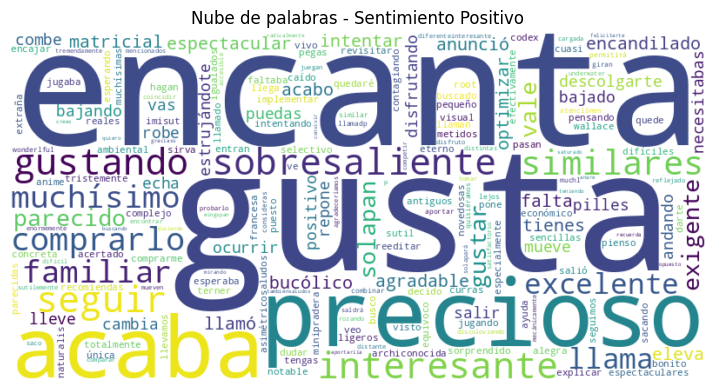

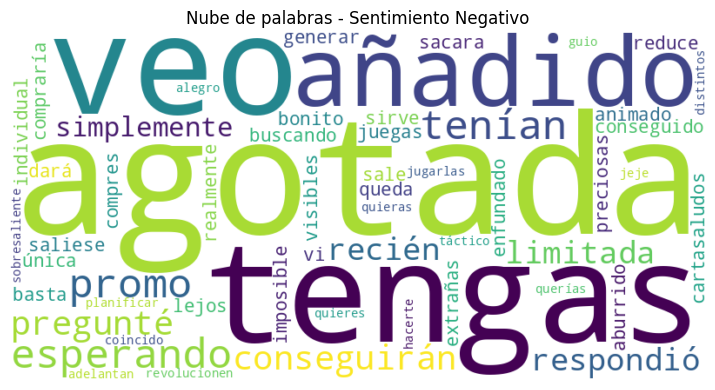

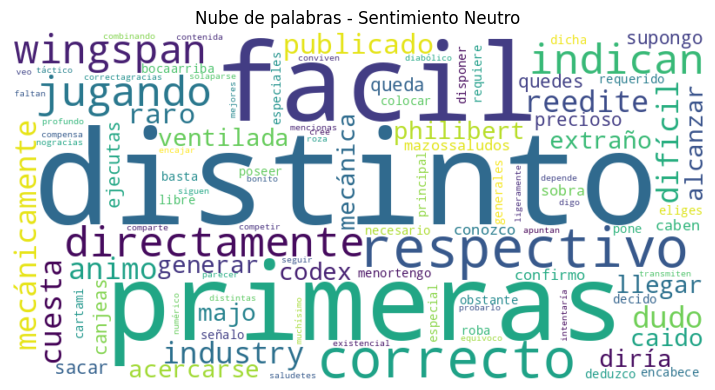

In [144]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy
# Filtrar solo palabras con etiqueta POS relevante
import spacy
nlp = spacy.load("es_core_news_md")

def filtrar_opinion(texto):
    doc = nlp(texto)
    return " ".join([token.text for token in doc if token.pos_ in ["ADJ", "VERB", "ADV"]])

df_sentimientos["comentario_filtrado"] = df_sentimientos["comentario"].apply(filtrar_opinion)
stopwords_spacy = nlp.Defaults.stop_words
stopwords_wc = set(STOPWORDS)
stopwords_totales = stopwords_wc.union(stopwords_spacy)
stopwords_totales.update(["jugar", "juego", "cartas", "puedes","deja","entrar","coge","coges","colocarla","compré","comprar","gustado","salido"])

# Generar nube por cada sentimiento
for sentimiento in df_sentimientos['sentimiento'].unique():
    texto = " ".join(df_sentimientos[df_sentimientos['sentimiento'] == sentimiento]['comentario_filtrado'])

    nube = WordCloud(
        width=800,
        height=400,
        background_color="white",
        stopwords=stopwords_totales,
        colormap="viridis"
    ).generate(texto)

    plt.figure(figsize=(8, 4))
    plt.imshow(nube, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Nube de palabras - Sentimiento {sentimiento}")
    plt.tight_layout()
    plt.show()

Con esta nube de palabras para cada categoria de sentimientos podemos ver las palabras mas representativas para cada una. Aunque en neutra y negativas tenenmos menos comentarios(como podemos ver en el grafico de abajo),lo que hace mas dificil al modelo tener menos palabras para clasificarlas, aun asi hay algunas palabras que las representan:
- Neutras: Facil, distinto, cuesta, raro, extraño, dificil.
- Negativas: agotada, imposible, limitada, aburrido(aca es donde se nos hace mas dificil tener palabras representativas, por la poca cantidad de comentarios clasificados como negativos)
- Positivas: precioso, sobresaliente, gusta, encanta, interesante, familiar

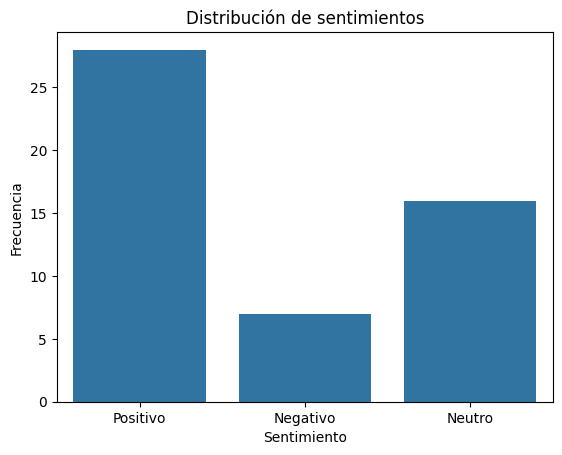

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df_sentimientos, x='sentimiento')
plt.title('Distribución de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()

# Ejercicio 6

In [97]:
import pandas as pd
consultas = pd.read_csv('consultas.csv')
consultas

,pregunta,categoria
0,¿Cómo reglas básicas de Pradera?,Información
1,¿Cómo mecánica de construcción de cartas?,Información
2,¿Cómo componentes del juego?,Información
3,¿Cómo objetivo del juego?,Información
4,¿Cómo edad mínima recomendada?,Información
...,...,...
340,¿Qué símbolos aparecen con más frecuencia en e...,Estadísticas
341,¿Cuál es el rango de puntos que puede obteners...,Estadísticas
342,¿Qué cartas tienen mayor sinergia según partid...,Estadísticas
343,¿Qué combinación de cartas suele generar más p...,Estadísticas


In [98]:
consultas['categoria'].value_counts()

,count
categoria,
Estadísticas,132
Información,130
Relaciones,83


Vemos que hay cierto balance, para que los modelos se puedan entrenar bien

## Tfid + Logistic

In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
# Primero extraemos ambas columnas como Series
preguntas_series = consultas["pregunta"]
categorias_series = consultas["categoria"]

# Luego convertimos las Series a listas
consultas = preguntas_series.tolist()
categorias = categorias_series.tolist()

X = [consulta.lower() for consulta in consultas]
y = [categoria.lower() for categoria in categorias]
# Train/test split
X_train, X_test, y_train_L, y_test_L = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorizamos
vectorizer = TfidfVectorizer()
X_train_vect_L = vectorizer.fit_transform(X_train)
X_test_vect_L = vectorizer.transform(X_test)

In [100]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

#Utilizamos gridsearch para encontrar los parametros optimos
param_grid = {
    'penalty' : ['l1', 'l2', 'elasticnet'],
    'max_iter': [100, 1000, 500, 2000]
}
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = param_grid,
                           cv=5,
                           scoring='accuracy')

grid_search.fit(X_train_vect_L, y_train_L)
# Mejores hiperparámetros encontrados durante la búsqueda aleatoria
first_best_params = grid_search.best_params_
model = grid_search.best_estimator_
# Entrenamos el modelo con estos hiperparámetros
best_prediction = grid_search.predict(X_test_vect_L)
test_accuracy = accuracy_score(y_test_L, best_prediction)

In [101]:
print(f'{first_best_params} \n {test_accuracy}')

{'max_iter': 100, 'penalty': 'l2'} 
 0.9134615384615384


In [102]:
# Evaluación
y_pred_L = model.predict(X_test_vect_L)
prec_L = precision_score(y_test_L, y_pred_L, average='macro')
acc_L = accuracy_score(y_test_L, y_pred_L)
rec_L= recall_score(y_test_L, y_pred_L, average='macro')
print(classification_report(y_test_L ,y_pred_L))

              precision    recall  f1-score   support

estadísticas       0.95      0.88      0.91        41
 información       0.84      0.97      0.90        39
  relaciones       1.00      0.88      0.93        24

    accuracy                           0.91       104
   macro avg       0.93      0.91      0.92       104
weighted avg       0.92      0.91      0.91       104



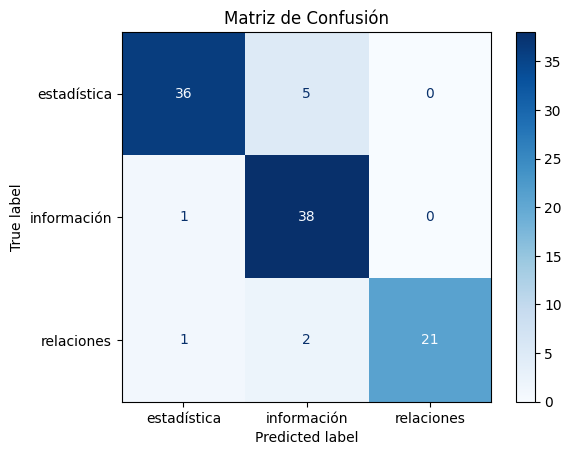

In [103]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_L = confusion_matrix(y_test_L, y_pred_L)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_L, display_labels=['estadística', 'información','relaciones'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()

## Tdif + Bayes ingenuos

In [104]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder

X_train, X_test, y_train_B, y_test_B = train_test_split(X, y, test_size=0.3, random_state=42)

#Transformamos las cateogrias con label encoder
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train_B)
y_test_encoded = encoder.fit_transform(y_test_B)

# Vectorizamos
vectorizer = TfidfVectorizer()
X_train_vect_B = vectorizer.fit_transform(X_train)
X_test_vect_B = vectorizer.transform(X_test)

In [105]:
from sklearn.naive_bayes import MultinomialNB
# Definición y Entrenamiento del Modelo
mnb = MultinomialNB()
mnb.fit(X_train_vect_B, y_train_encoded)

MultinomialNB()

In [106]:
y_pred_B= mnb.predict(X_test_vect_B)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calcular métricas
prec_B = precision_score(y_test_encoded, y_pred_B, average='macro')
acc_B = accuracy_score(y_test_encoded, y_pred_B)
rec_B= recall_score(y_test_encoded, y_pred_B, average='macro')
# Crear una tabla con las métricas
metricas2 = pd.DataFrame({
    'Precision': [prec_B],
    'Accuracy': [acc_B],
    'Recall': [rec_B]
})

print(metricas2)

   Precision  Accuracy    Recall
0   0.913216  0.894231  0.886283


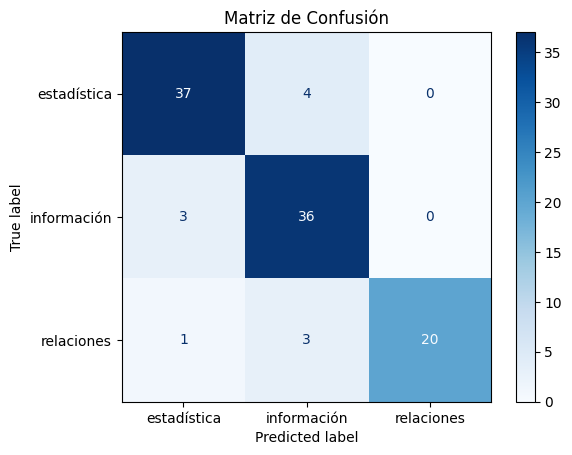

In [108]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_B = confusion_matrix(y_test_encoded, y_pred_B)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_B, display_labels=['estadística', 'información','relaciones'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()

## Tfid + Random Forest

In [109]:
# Train/test split
X_train, X_test, y_train_R, y_test_R = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorizamos
vectorizer = TfidfVectorizer()
X_train_vect_R = vectorizer.fit_transform(X_train)
X_test_vect_R = vectorizer.transform(X_test)

In [110]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
#Grid search para obtener los parametros de random forest optimos
param_grid = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = param_grid,
                           cv=5,
                           scoring='accuracy')

In [111]:
grid_search.fit(X_train_vect_R, y_train_R)
modelo_R = grid_search.best_estimator_
# Evaluación
y_pred_R = modelo_R.predict(X_test_vect_R)
prec_R = precision_score(y_test_R, y_pred_R, average='macro')
acc_R = accuracy_score(y_test_R, y_pred_R)
rec_R= recall_score(y_test_R, y_pred_R, average='macro')
print(classification_report(y_test_R, y_pred_R))

              precision    recall  f1-score   support

estadísticas       0.97      0.80      0.88        41
 información       0.73      0.97      0.84        39
  relaciones       1.00      0.75      0.86        24

    accuracy                           0.86       104
   macro avg       0.90      0.84      0.86       104
weighted avg       0.89      0.86      0.86       104



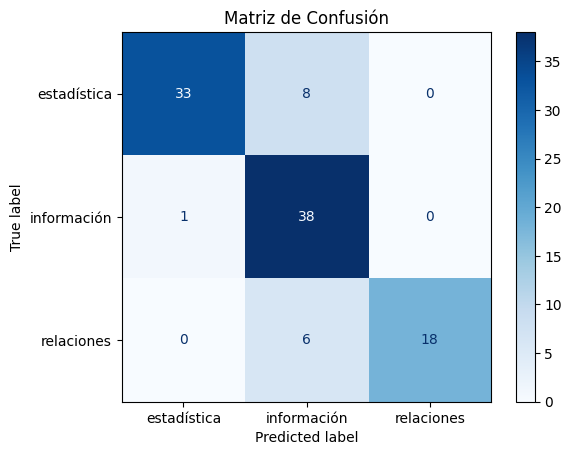

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_R = confusion_matrix(y_test_R, y_pred_R)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_R, display_labels=['estadística', 'información','relaciones'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()

## Bert + Random forest

In [113]:
from transformers import BertTokenizer, BertModel
import torch

# Cargar modelo BERT multilingüe
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")
model_bert = BertModel.from_pretrained("bert-base-multilingual-cased")

# Función para extraer embedding [CLS]
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=64)
    with torch.no_grad():
        outputs = model_bert(**inputs)
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze().numpy()
    return cls_embedding
#Leemos de nuevo ya que aca necesitamos un dataframe
consultas_BR = pd.read_csv('consultas.csv')
# Convertir preguntas en embeddings
consultas_BR["embedding"] = consultas_BR["pregunta"].apply(get_bert_embedding)

# Armar X, y
X_BR = np.stack(consultas_BR["embedding"].values)
y_BR = consultas_BR["categoria"]

# Train-test split
X_train_BR, X_test_BR, y_train_BR, y_test_BR = train_test_split(X_BR, y_BR, test_size=0.3, random_state=42)

#Grid search para obtener los parametros de random forest optimos
param_grids_BR = {
    'criterion' : ['gini', 'entropy'],
    'n_estimators': [10, 50, 100],
    'max_depth': [2, 5, 10]
}
grid_search_BR = GridSearchCV(estimator = RandomForestClassifier(),
                           param_grid = param_grids_BR,
                           cv=5,
                           scoring='accuracy')
# Clasificador
grid_search_BR.fit(X_train_BR, y_train_BR)
modelo_BR = grid_search_BR.best_estimator_
modelo_BR.fit(X_train_BR, y_train_BR)
y_pred_BR = modelo_BR.predict(X_test_BR)

prec_BR = precision_score(y_test_BR, y_pred_BR, average='macro')
acc_BR = accuracy_score(y_test_BR, y_pred_BR)
rec_BR = recall_score(y_test_BR, y_pred_BR, average='macro')

# Evaluación
print(classification_report(y_test_BR, y_pred_BR))

              precision    recall  f1-score   support

Estadísticas       0.97      0.85      0.91        41
 Información       0.86      0.97      0.92        39
  Relaciones       0.96      0.96      0.96        24

    accuracy                           0.92       104
   macro avg       0.93      0.93      0.93       104
weighted avg       0.93      0.92      0.92       104



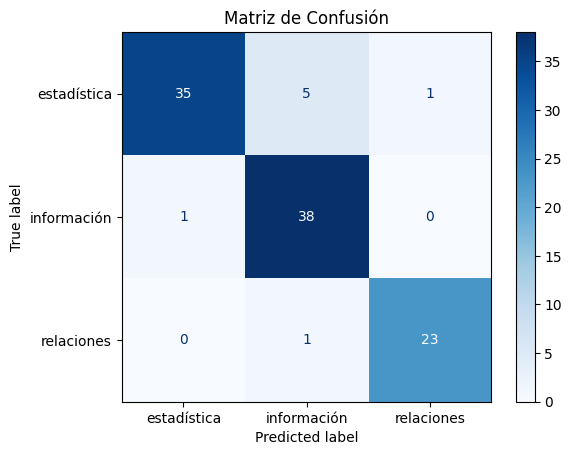

In [114]:
cm_BR = confusion_matrix(y_test_BR, y_pred_BR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_BR, display_labels=['estadística', 'información','relaciones'])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Matriz de Confusión")
plt.show()

## Comparaciones

In [115]:
# Crear un DataFrame con métricas de evaluación
resultados = pd.DataFrame({
    "Modelo": ["Logistic Regression", "Naive Bayes", "Random Forest", "BERT + RF"],
    "Accuracy": [acc_L, acc_B, acc_R, acc_BR],
    "Precision": [prec_L, prec_B, prec_R, prec_BR],
    "Recall": [rec_L, rec_B, rec_R, rec_BR]
})

display(resultados)

,Modelo,Accuracy,Precision,Recall
0,Logistic Regression,0.913462,0.930604,0.909136
1,Naive Bayes,0.894231,0.913216,0.886283
2,Random Forest,0.855769,0.900452,0.843079
3,BERT + RF,0.923077,0.931397,0.928784


BERT + RF es el que logra el mejor rendimiento global, con la mayor precisión y el mayor recall.

Logistic Regression y Random Forest empatan en todas las métricas, lo que sugiere que ambos están capturando bien la información semántica a partir de TF-IDF.

Naive Bayes queda un poco atrás, aunque sigue siendo razonablemente bueno.

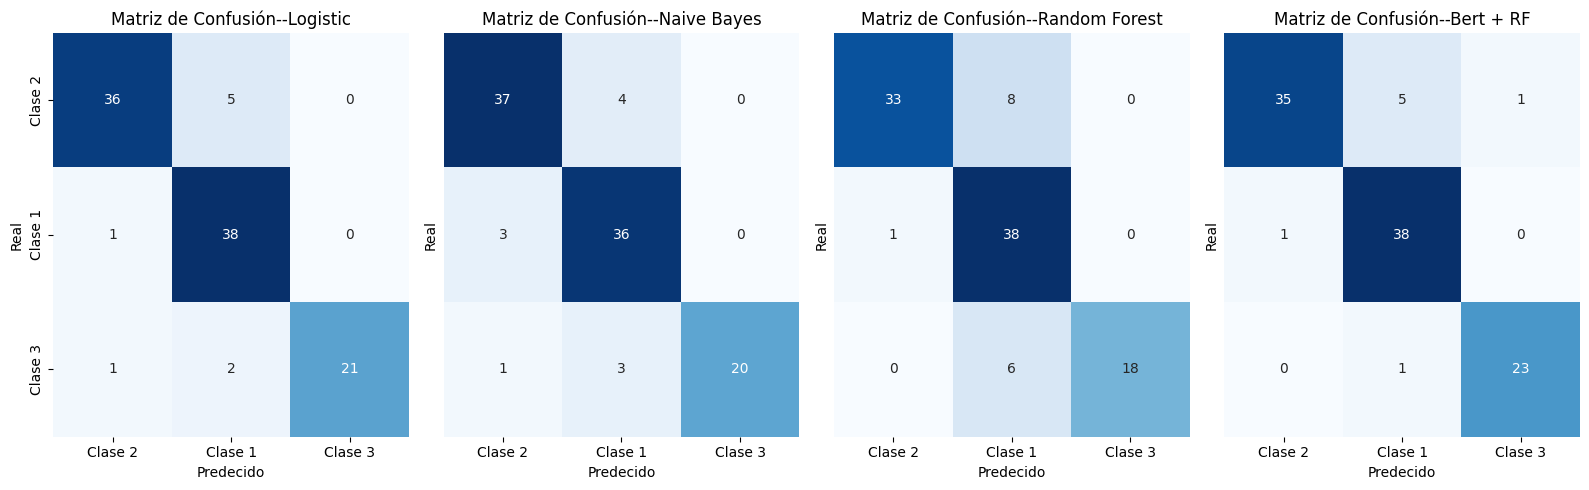

In [116]:
fig, axes = plt.subplots(1, 4, figsize=(16, 5))  # 1 fila, 4 columnas

# Primer heatmap
sns.heatmap(cm_L, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 2', 'Clase 1', 'Clase 3'],
            yticklabels=['Clase 2', 'Clase 1', 'Clase 3'],
            cbar=False, ax=axes[0])
axes[0].set_xlabel('Predecido')
axes[0].set_ylabel('Real')
axes[0].set_title('Matriz de Confusión--Logistic')

# Segundo heatmap
sns.heatmap(cm_B, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 2', 'Clase 1', 'Clase 3'],
            cbar=False, ax=axes[1],yticklabels=False)
axes[1].set_xlabel('Predecido')
axes[1].set_ylabel('Real')
axes[1].set_title('Matriz de Confusión--Naive Bayes')

# Tercer heatmap
sns.heatmap(cm_R, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 2', 'Clase 1', 'Clase 3'],
            cbar=False, ax=axes[2],yticklabels=False)
axes[2].set_xlabel('Predecido')
axes[2].set_ylabel('Real')
axes[2].set_title('Matriz de Confusión--Random Forest')

# Cuarto heatmap
sns.heatmap(cm_BR, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Clase 2', 'Clase 1', 'Clase 3'],
            cbar=False, ax=axes[3],yticklabels=False)
axes[3].set_xlabel('Predecido')
axes[3].set_ylabel('Real')
axes[3].set_title('Matriz de Confusión--Bert + RF')

plt.tight_layout()
plt.show()

- Clase 1 (Información)
Todos los modelos predicen muy bien esta clase.

Máximos aciertos con Logistic, RF y BERT + RF (38), y Naive Bayes casi igual (36).

- Clase 2 (Relaciones)
BERT + RF es el más preciso (38 aciertos).

Logistic y Naive Bayes también bien (36–37).

Random Forest confunde 7 veces con clase 1.

- Clase 3 (Estadísticas)
Es la clase más difícil para todos.

BERT + RF es el mejor (22 aciertos y solo 2 errores).

Logistic y Bayes tienen más confusión con clase 1.

Random Forest falla un poco más (17 aciertos y 7 errores con clase 1).

In [117]:
consulta = "¿Cómo se usan las cartas especiales?"

# Vectorizar según corresponda
consulta_tfidf = vectorizer.transform([consulta])
consulta_bert = get_bert_embedding(consulta).reshape(1, -1)
df_pred = pd.DataFrame({
    "Modelo": ["Logistic", "NB 0-stat 1-info 2-rel", "Random Forest", "BERT + RF"],
    "Predicción": [
        model.predict(consulta_tfidf)[0],
        mnb.predict(consulta_tfidf)[0],
        modelo_R.predict(consulta_tfidf)[0],
        modelo_BR.predict(consulta_bert)[0]
    ]
})
display(df_pred)

,Modelo,Predicción
0,Logistic,información
1,NB 0-stat 1-info 2-rel,1
2,Random Forest,información
3,BERT + RF,Información


## Conclusion

Si pretendemos un modelo simple y rapido lo mejor es usar logistic o random forest con tfid. Si pretendemos mejor rendimiento y mayor comprensión semántica, BERT + RF es superior, especialmente cuando las consultas son ambiguas o variadas. Por lo tanto ya que el objetivo es tener un buen modelo de clasificacion, me quedo con BERT + RF. Aunque implica mayor costo computacional, su rendimiento justifica el uso en contextos reales o productivos.



## Predicciones

In [125]:
def predecir_categoria(consultas, clf):
    # Asegurarse de que sea una lista
    if isinstance(consultas, str):
        consultas = [consultas]

    # Paso 1: vectorizar todas las consultas con BERT
    inputs = tokenizer(consultas, return_tensors="pt", truncation=True, padding=True, max_length=64)
    with torch.no_grad():
        outputs = model_bert(**inputs)
    cls_embeddings = outputs.last_hidden_state[:, 0, :].numpy()  # (n_consultas, hidden_dim)

    # Paso 2: predecir con el modelo entrenado
    preds = clf.predict(cls_embeddings)
    return preds

In [127]:
consultas = [
    "¿Cuál es el valor más común en el juego?",
    "¿Quienes son los desarrolladores?",
    "¿Cómo se usan las cartas especiales?"
]

categorias_predichas = predecir_categoria(consultas, modelo_BR)

for pregunta, pred in zip(consultas, categorias_predichas):
    print(f"🗨️ Consulta: {pregunta}")
    print(f"📌 Categoría predicha: {pred}")
    print("—" * 50)

🗨️ Consulta: ¿Cuál es el valor más común en el juego?
📌 Categoría predicha: Estadísticas
——————————————————————————————————————————————————
🗨️ Consulta: ¿Quienes son los desarrolladores?
📌 Categoría predicha: Relaciones
——————————————————————————————————————————————————
🗨️ Consulta: ¿Cómo se usan las cartas especiales?
📌 Categoría predicha: Información
——————————————————————————————————————————————————
